## MET CS 521 Final Project: <br> Predicting Housing Prices (Linear Regression) 
#### <i>Due: Friday, May 13th, 2022, 11:59PM EST</i>

Authors: Daniela Demaestri and Alex Mao<br>
GitHub usernames: ddemaest-bu and alexmao0501


### 1. Progammatically download a data-set for analysis.

In [31]:
import requests

In [32]:
url = "https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv"

In [33]:
r = requests.get(url, allow_redirects = True)

In [34]:
content = r.content

In [35]:
r.content.decode('utf-8')[:100]

'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Lan'

In [36]:
file = 'h.csv'
open(file,'wb').write(content)

950547

### 2. Preparing environment, importing modules, and taking a quick look at the dataset.

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Importing and reading csv file using pandas.

In [38]:
housing = pd.read_csv(file)

In [39]:
# preview dataset:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


#### Dataset shape - (# rows, # columns).
There are 2,919 rows and 81 columns

In [40]:
housing.shape

(2919, 81)

#### Preview some basic dataset information.
Some quick observations:
More than half of the columns (43) store "object" datatypes and, in other words, most likely refer to qualitative data. 38 columns contain numeric data (26 columns contain integer datatype and 12 columns conntain floats.)

In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### 3. Handling Nulls/Missing Values in the Dataset:

There are 1459 null values in the SalePrice column, the target variable. This is 49.98% of the rows. 

We will have to decide whether or not to drop these nulls.

In [42]:
#check for columns with null values:
null_housing = housing.isnull().sum()
print(null_housing[null_housing > 0])

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


### **Future Work... it may be important to work with the qualitative varibales and transform a few to dummy variables

Those that come to mine 

### 4. Taking a closer look at and understanding the data: 

In [43]:
# view descriptive info for columns with object datatypes
housing.describe(exclude='number').T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


#### Summary statistics for columns with quantitative data 

In [44]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


### Taking a closer look at our target variable: SalePrice

Just taking a look at the distribution of Sale Price, we can see the graph is right-skewed.

''

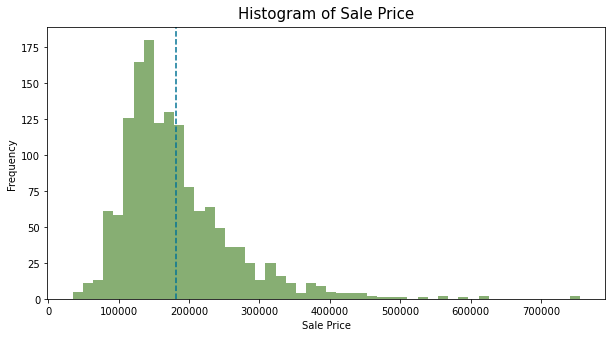

In [45]:
housing_saleprice_hist = housing.SalePrice.plot(kind='hist', figsize= (10,5), bins=50,color=('#87ae73'));
housing_saleprice_hist.set_title('Histogram of Sale Price', fontsize=15, y=1.01);
plt.xlabel('Sale Price')
housing_saleprice_hist.axvline(np.mean(housing['SalePrice']), color='#047495', linestyle='--') # Add mean to the histogram
;

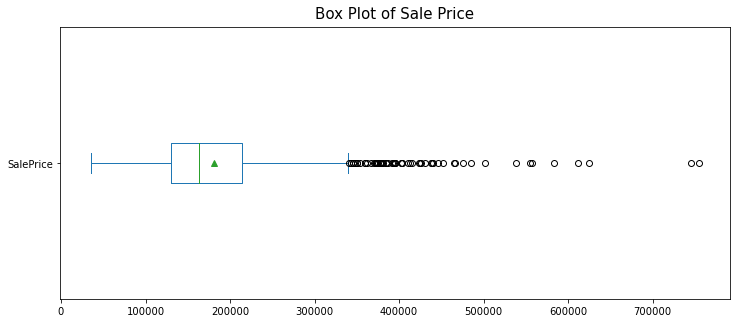

In [46]:
box_plot_saleprice = housing.SalePrice.plot(kind='box', figsize= (12,5),vert=False, showmeans=True);
box_plot_saleprice.set_title('Box Plot of Sale Price', fontsize=15, y=1.01);

In [47]:
#get mean sale price:
saleprice_mean = housing.SalePrice.mean()
saleprice_mean

180921.19589041095

#### What is the relationship between Sale Price and Lot Area?

In the graph below, we can observe quite a few outliers when it comes to Lot Area. By removing the outliers, we can take a better look at the relationship between Sale Price and Lot Area.

When looking at the graph without the outliers, you can observe a slight positive correlatation between Sale Price and Lot Area.

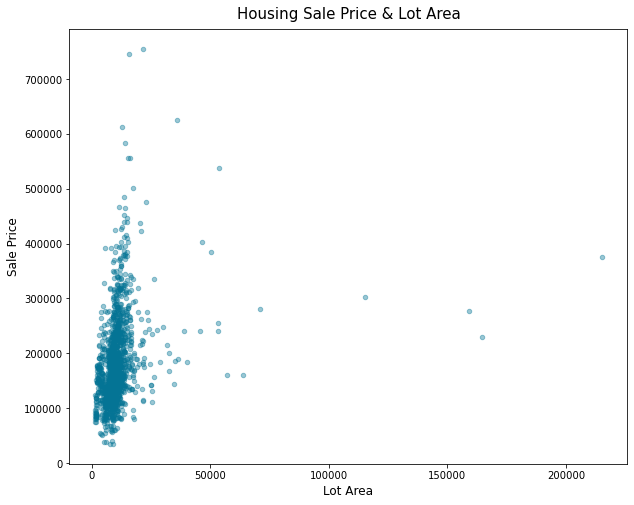

In [48]:
lotarea_saleprice = housing.plot(kind='scatter', x='LotArea', y='SalePrice', figsize=(10, 8), color = ('#047495'), alpha = 0.4);
lotarea_saleprice.set_title('Housing Sale Price & Lot Area', fontsize=15, y=1.01);
plt.xlabel('Lot Area', fontsize=12);
plt.ylabel('Sale Price', fontsize=12);

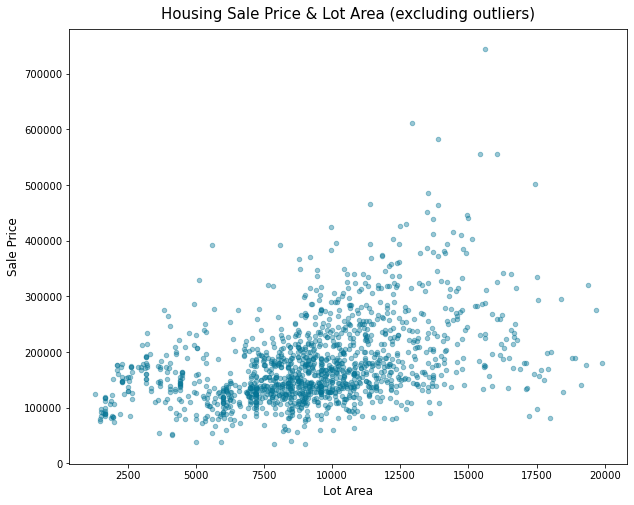

In [49]:
lotarea_saleprice = housing[housing['LotArea']<20000].plot(kind='scatter', x='LotArea', y='SalePrice', figsize=(10, 8), color = ('#047495'), alpha = 0.4);
lotarea_saleprice.set_title('Housing Sale Price & Lot Area (excluding outliers)', fontsize=15, y=1.01);
plt.xlabel('Lot Area', fontsize=12);
plt.ylabel('Sale Price', fontsize=12);

##### Sale Price vs. Lot Area (without outliers) with regression line

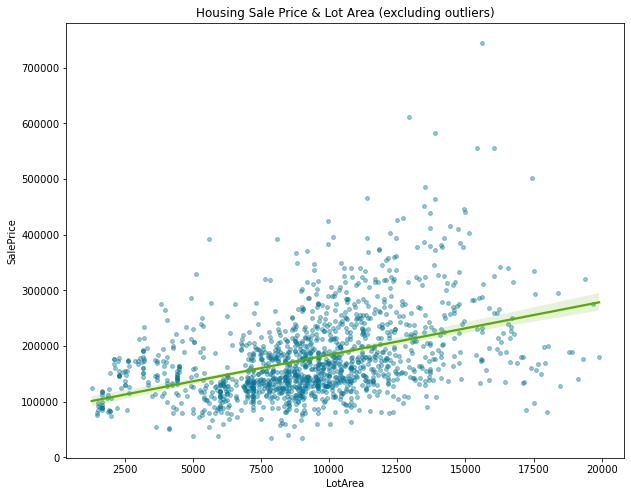

In [50]:
ax = sns.regplot(x="LotArea", y="SalePrice", data=housing[housing['LotArea']<20000], line_kws={"color": "#5ca904"}, scatter_kws={"color": "#047495",'s':15, 'alpha':0.4})
ax.set(title='Housing Sale Price & Lot Area (excluding outliers)')
ax.figure.set_size_inches(10, 8)


#### What is the relationship between Sale Price and # Bedrooms?

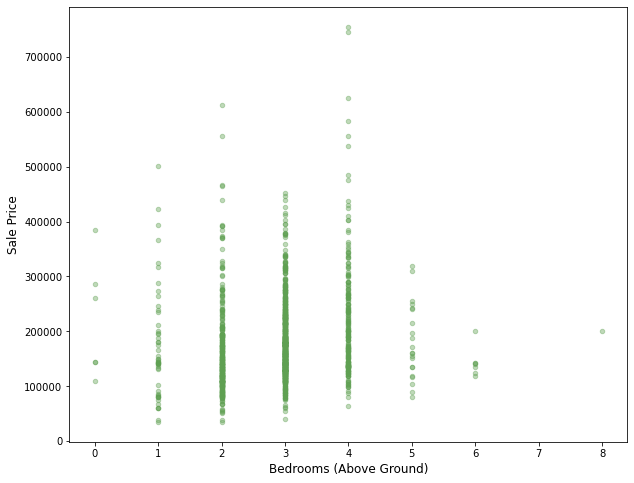

In [51]:
bedrooms_saleprice = housing.plot(kind='scatter', x='BedroomAbvGr', y='SalePrice', figsize=(10, 8), color = ('#5fa052'), alpha = 0.4);
lotarea_saleprice.set_title('Housing Sale Price & Lot Area', fontsize=15, y=1.01);
plt.xlabel('Bedrooms (Above Ground)', fontsize=12);
plt.ylabel('Sale Price', fontsize=12);

### Correlation Heat Map

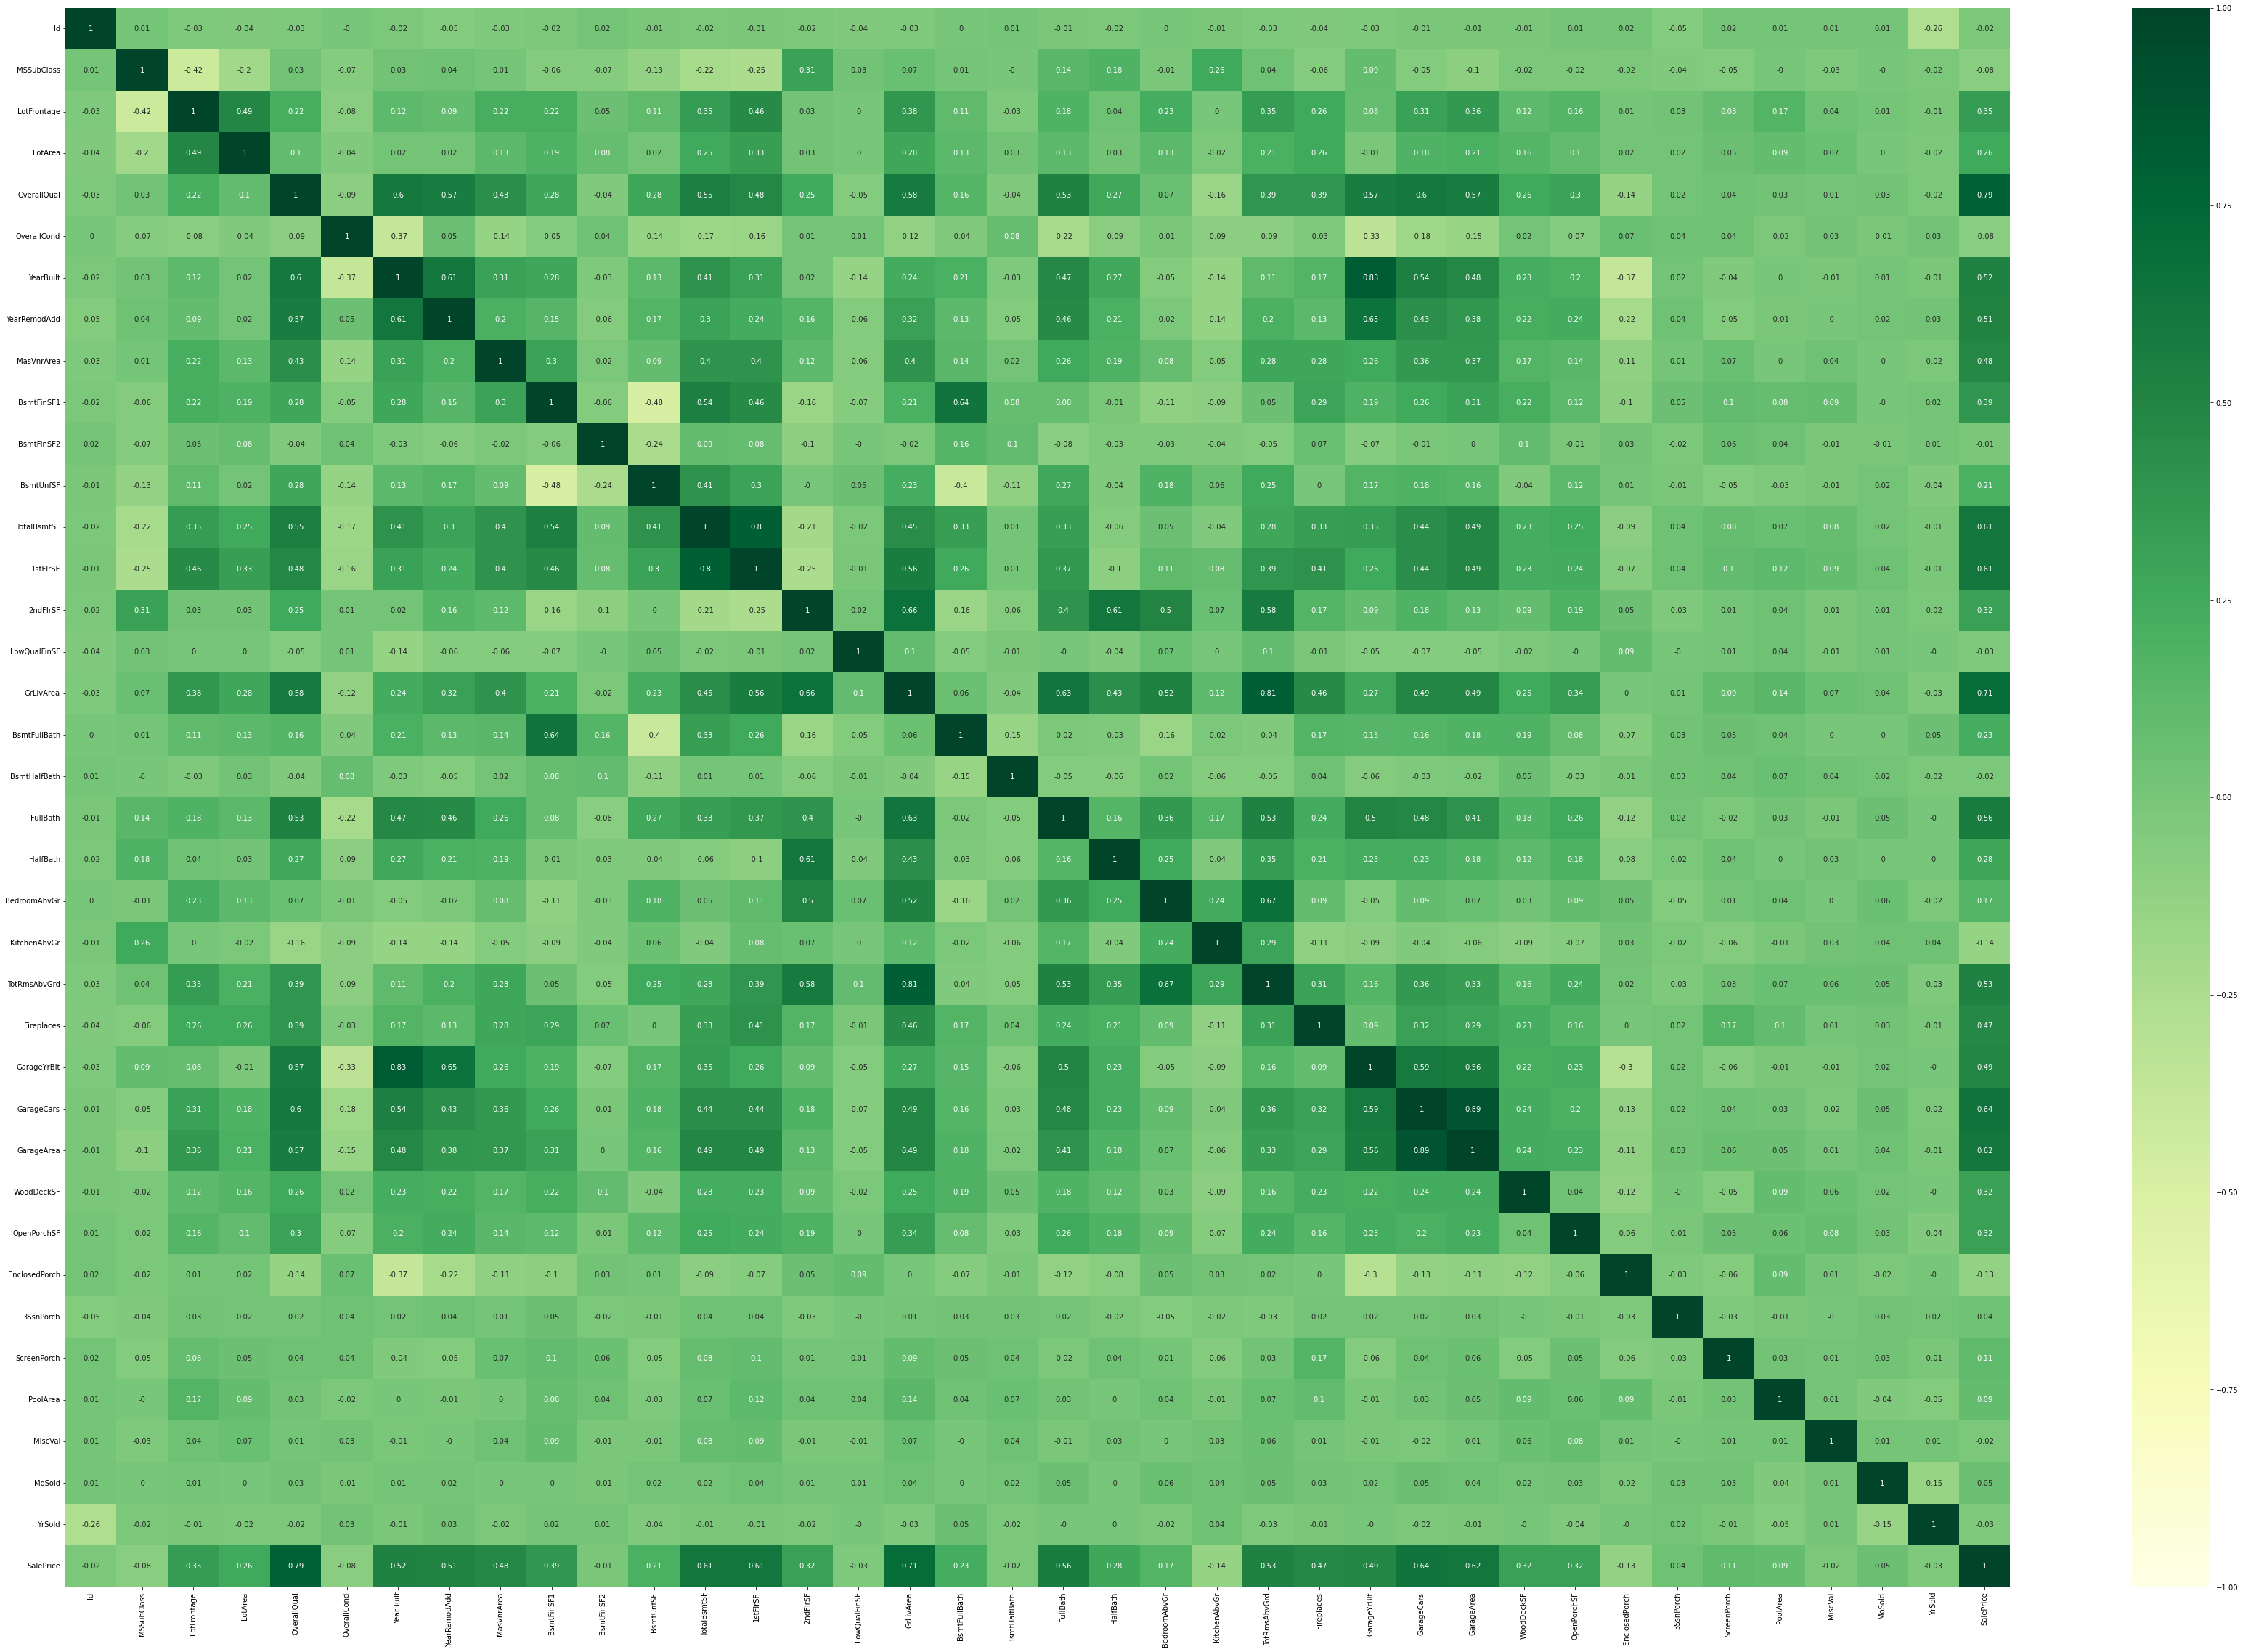

In [52]:
plt.figure(figsize=(60, 40))

heatmap = sns.heatmap(housing.corr().round(decimals=2), vmin=-1, vmax=1,annot=True, cmap='YlGn')


#### Which housing features are correlated with sale price?

In [53]:
corr_saleprice = pd.DataFrame(housing.corrwith(housing.SalePrice).sort_values(ascending=False), columns = ['correlation'])
corr_saleprice

,correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


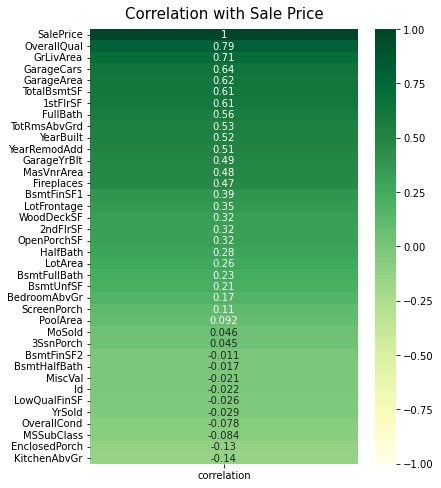

In [54]:
plt.figure(figsize=(6, 8))
heat_saleprice_corr = sns.heatmap(corr_saleprice, vmin=-1, vmax=1,annot=True, cmap='YlGn')
heat_saleprice_corr.set_title('Correlation with Sale Price', fontsize=15, y=1.01);

#### What is the relationship between Sale Price and Overall Quality?

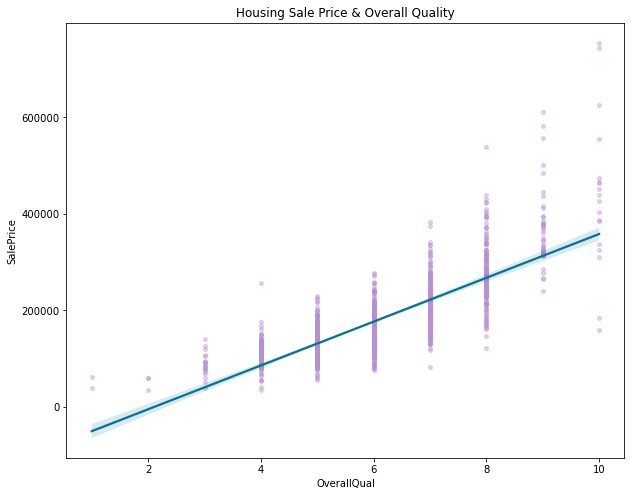

In [55]:
ax = sns.regplot(x="OverallQual", y="SalePrice", data=housing, line_kws={"color": "#047495"}, scatter_kws={"color": "#b790d4",'s':15, 'alpha':0.4})
ax.set(title='Housing Sale Price & Overall Quality')
ax.figure.set_size_inches(10, 8)


#### Taking a look at Sale Condition

In [63]:
def bar_perc(data, variable):
    
    total = len(data[variable]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(x=data[variable],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
    plt.show() # show the plot

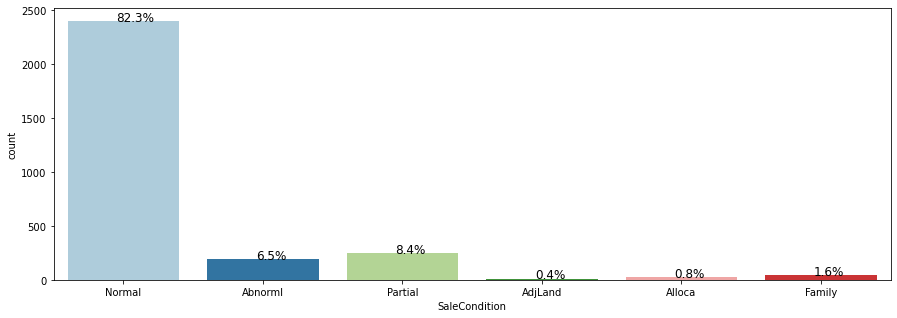

In [64]:
bar_perc(housing, 'SaleCondition')

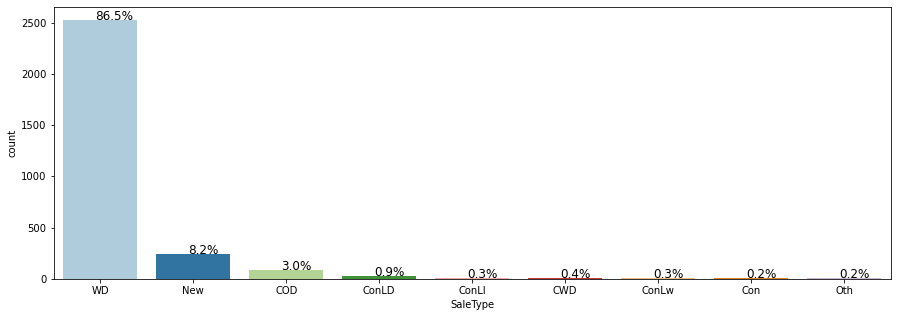

In [65]:
bar_perc(housing, 'SaleType')

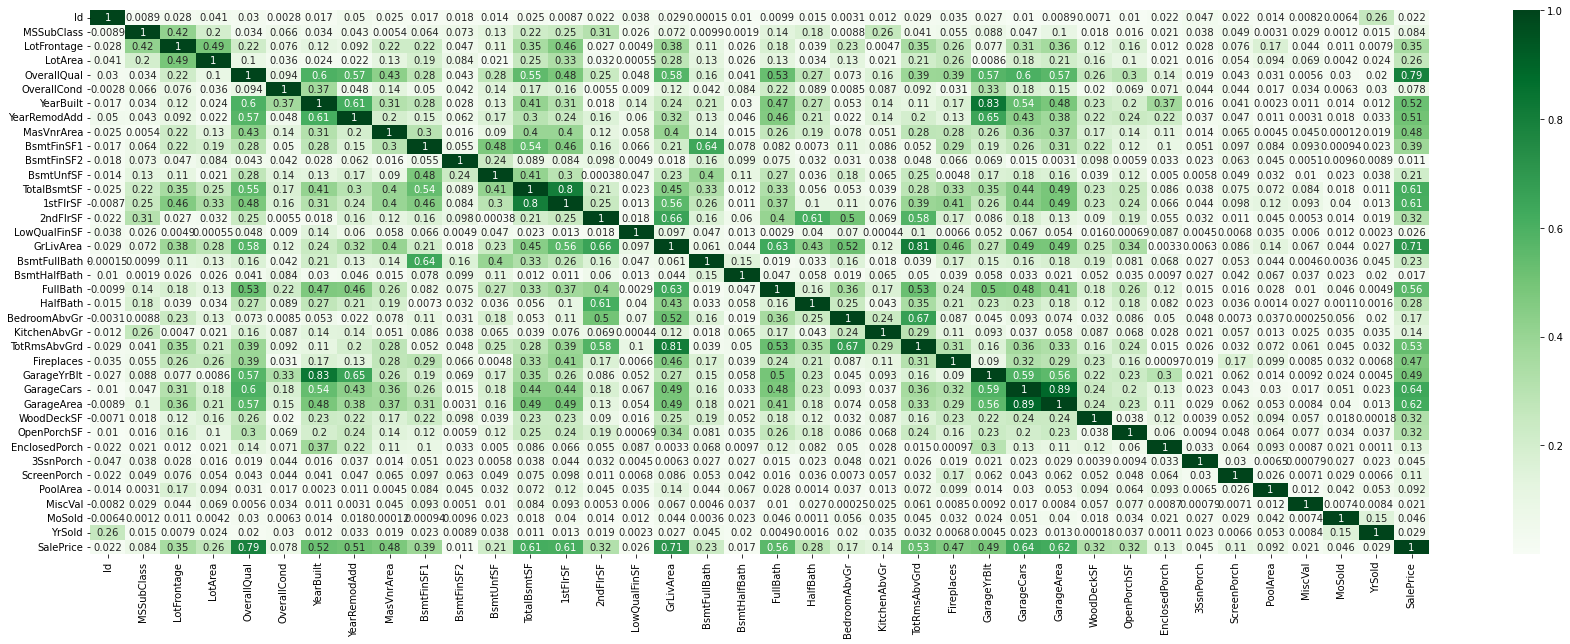

In [96]:
corr_m = housing.corr()
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
sn.heatmap(corr_m.abs(),annot=True, cmap='Greens')
plt.show()

In [125]:
outsidesurr_df = housing[['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'PavedDrive', 
                    'Street', 'Alley', 'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType', 'LotShape', 
                     'SaleCondition', 'SalePrice']]

building_df = housing[['Id', 'MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Functional', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SaleType',
                    'SaleCondition', 'SalePrice']]

utilities_df = housing[['Id', 'Utilities', 'Heating', 'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MiscVal', 'MoSold',
                     'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

ratings_df = housing[['Id', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                   'GarageCond', 'GarageQual', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

rooms_df = housing[['Id', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','TotRmsAbvGrd', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
                 'SaleCondition', 'SalePrice']]

In [126]:

# Set Id as index of the dataframe.
outsidesurr_df = outsidesurr_df.set_index('Id')
building_df = building_df.set_index('Id')
utilities_df = utilities_df.set_index('Id')
ratings_df = ratings_df.set_index('Id')
rooms_df = rooms_df.set_index('Id')

# Move SalePrice to the first column (Our Label)
sp0 = outsidesurr_df['SalePrice']
outsidesurr_df.drop(labels=['SalePrice'], axis=1, inplace=True)
outsidesurr_df.insert(0, 'SalePrice', sp0)

sp1 = building_df['SalePrice']
building_df.drop(labels=['SalePrice'], axis=1, inplace=True)
building_df.insert(0, 'SalePrice', sp1)

sp2 = utilities_df['SalePrice']
utilities_df.drop(labels=['SalePrice'], axis=1, inplace=True)
utilities_df.insert(0, 'SalePrice', sp2)

sp3 = ratings_df['SalePrice']
ratings_df.drop(labels=['SalePrice'], axis=1, inplace=True)
ratings_df.insert(0, 'SalePrice', sp3)

sp4 = rooms_df['SalePrice']
rooms_df.drop(labels=['SalePrice'], axis=1, inplace=True)
rooms_df.insert(0, 'SalePrice', sp4)

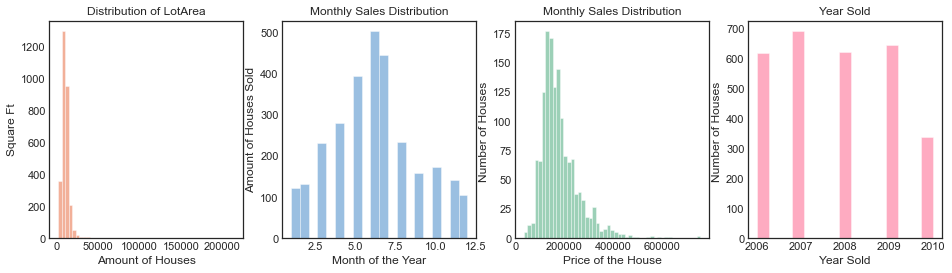

In [163]:
import seaborn as sns
sns.set_style('white')

f, axes = plt.subplots(ncols=4, figsize=(16,4))

# Lot Area: In Square Feet
sns.distplot(housing['LotArea'], kde=False, color="#DF3A01", ax=axes[0]).set_title("Distribution of LotArea")
axes[0].set_ylabel("Square Ft")
axes[0].set_xlabel("Amount of Houses")

# MoSold: Year of the Month sold
sns.distplot(housing['MoSold'], kde=False, color="#045FB4", ax=axes[1]).set_title("Monthly Sales Distribution")
axes[1].set_ylabel("Amount of Houses Sold")
axes[1].set_xlabel("Month of the Year")

# House Value
sns.distplot(housing['SalePrice'], kde=False, color="#088A4B", ax=axes[2]).set_title("Monthly Sales Distribution")
axes[2].set_ylabel("Number of Houses ")
axes[2].set_xlabel("Price of the House")

# YrSold: Year the house was sold.
sns.distplot(housing['YrSold'], kde=False, color="#FE2E64", ax=axes[3]).set_title("Year Sold")
axes[3].set_ylabel("Number of Houses ")
axes[3].set_xlabel("Year Sold")

plt.show()

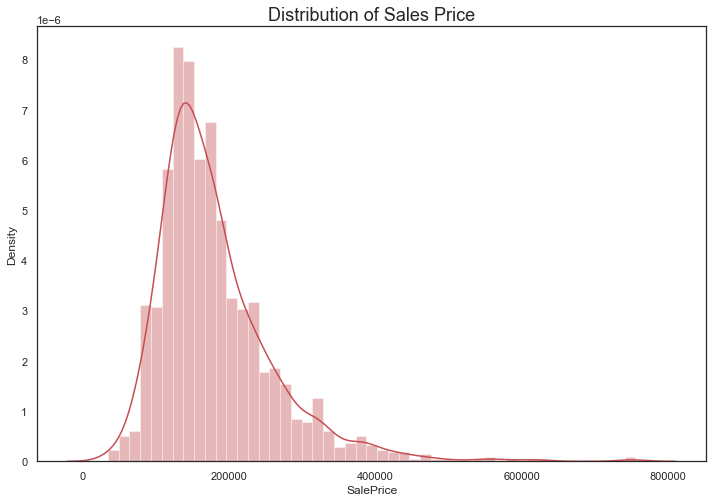

In [128]:
plt.figure(figsize=(12,8))
sns.distplot(housing['SalePrice'], color='r')
plt.title('Distribution of Sales Price', fontsize=18)

plt.show()

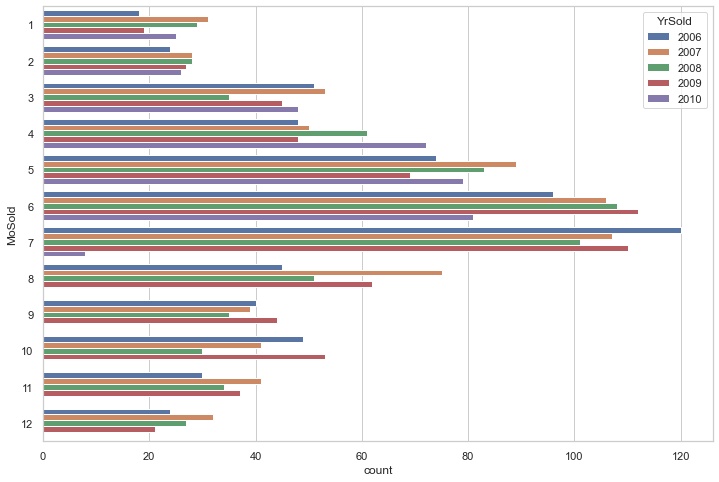

In [129]:
# People tend to move during the summer
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.countplot(y="MoSold", hue="YrSold", data=housing)
plt.show()

Text(0.5, 1.0, 'Houses Sold per Year')

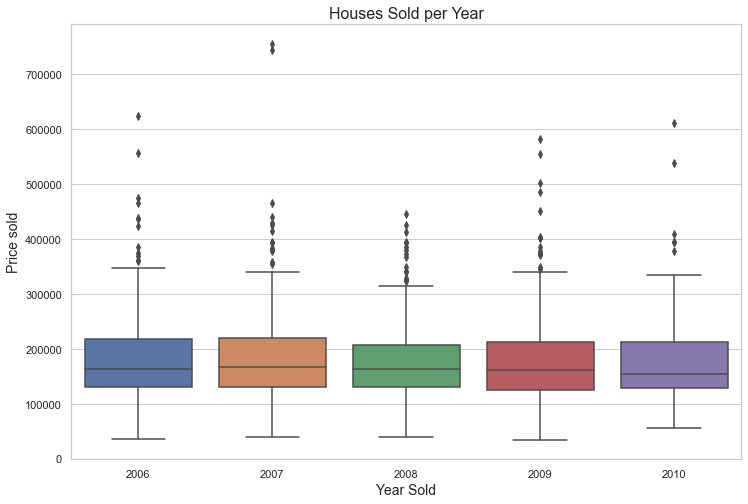

In [131]:
plt.figure(figsize=(12,8))
sns.boxplot(x='YrSold', y='SalePrice', data=housing)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price sold', fontsize=14)
plt.title('Houses Sold per Year', fontsize=16)

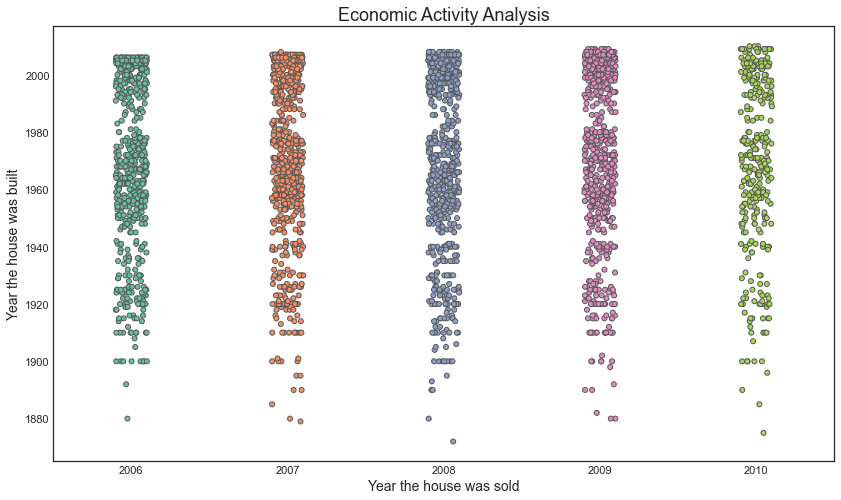

In [132]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-white')
sns.stripplot(x='YrSold', y='YearBuilt', data=housing, jitter=True, palette="Set2", linewidth=1)
plt.title('Economic Activity Analysis', fontsize=18)
plt.xlabel('Year the house was sold', fontsize=14)
plt.ylabel('Year the house was built', rotation=90, fontsize=14)
plt.show()

In [133]:
outsidesurr_df.describe()

,SalePrice,LotFrontage,LotArea,MoSold,YrSold
count,1460.000000,2433.000000,2919.000000,2919.000000,2919.000000
mean,180921.195890,69.305795,10168.114080,6.213087,2007.792737
std,79442.502883,23.344905,7886.996359,2.714762,1.314964
min,34900.000000,21.000000,1300.000000,1.000000,2006.000000
25%,129975.000000,59.000000,7478.000000,4.000000,2007.000000
50%,163000.000000,68.000000,9453.000000,6.000000,2008.000000
75%,214000.000000,80.000000,11570.000000,8.000000,2009.000000
max,755000.000000,313.000000,215245.000000,12.000000,2010.000000


In [134]:
outsidesurr_df.columns

Index(['SalePrice', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood',
       'Condition1', 'Condition2', 'PavedDrive', 'Street', 'Alley',
       'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType',
       'LotShape', 'SaleCondition'],
      dtype='object')

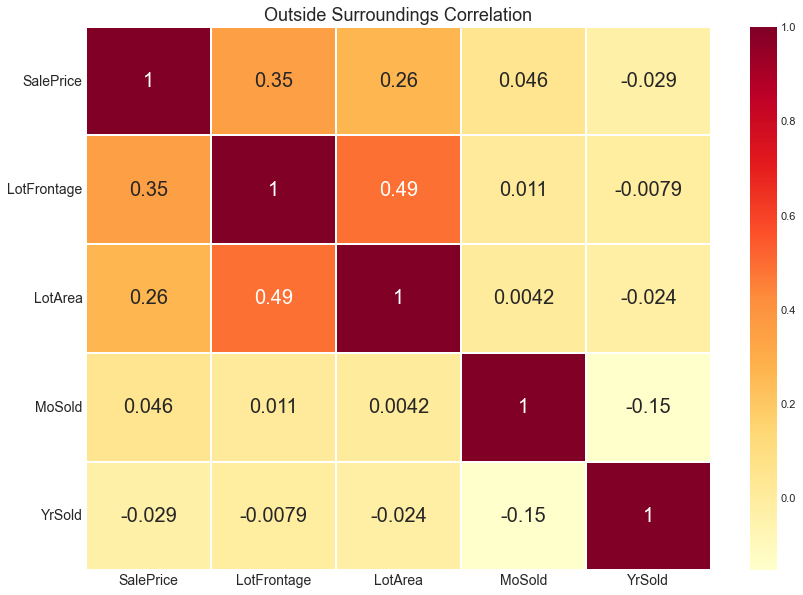

In [135]:
# Lot Area and Lot Frontage influenced hugely on the price. 
# However, YrSold does not have that much of a negative correlation with SalePrice as we previously thought.
# Meaning the state of IOWA was not affected as other states.
plt.style.use('seaborn-white')
corr = outsidesurr_df.corr()

sns.heatmap(corr,annot=True,cmap='YlOrRd',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title("Outside Surroundings Correlation", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

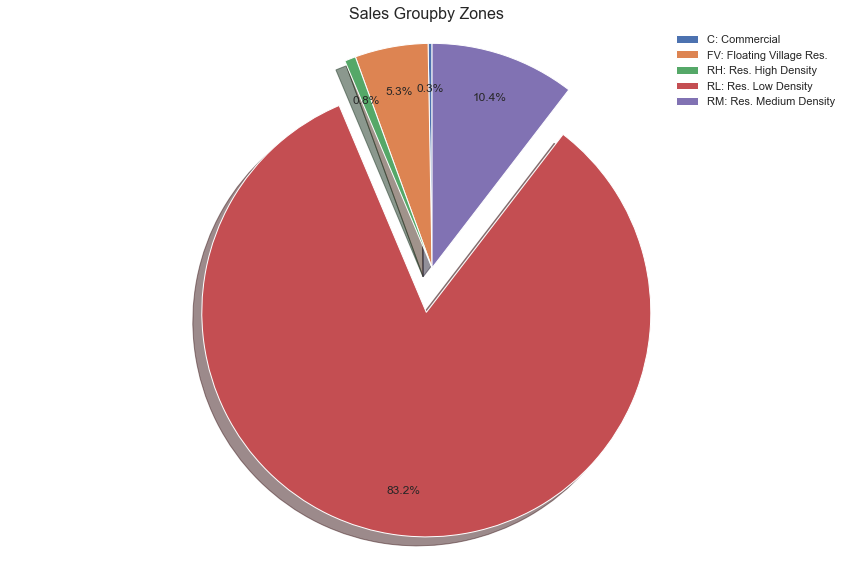

In [137]:
# We already know which neighborhoods were the most sold but which neighborhoods gave the most revenue. 
# This might indicate higher demand toward certain neighborhoods.
plt.style.use('seaborn-white')
zoning_value = housing.groupby(by=['MSZoning'], as_index=False)['SalePrice'].sum()
zoning = zoning_value['MSZoning'].values.tolist()


# Let's create a pie chart.
labels = ['C: Commercial', 'FV: Floating Village Res.', 'RH: Res. High Density', 'RL: Res. Low Density', 
          'RM: Res. Medium Density']
total_sales = zoning_value['SalePrice'].values.tolist()
explode = (0, 0, 0, 0.1, 0)

fig, ax1 = plt.subplots(figsize=(12,8))
texts = ax1.pie(total_sales, explode=explode, autopct='%.1f%%', shadow=True, startangle=90, pctdistance=0.8,
       radius=0.5)


ax1.axis('equal')
plt.title('Sales Groupby Zones', fontsize=16)
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

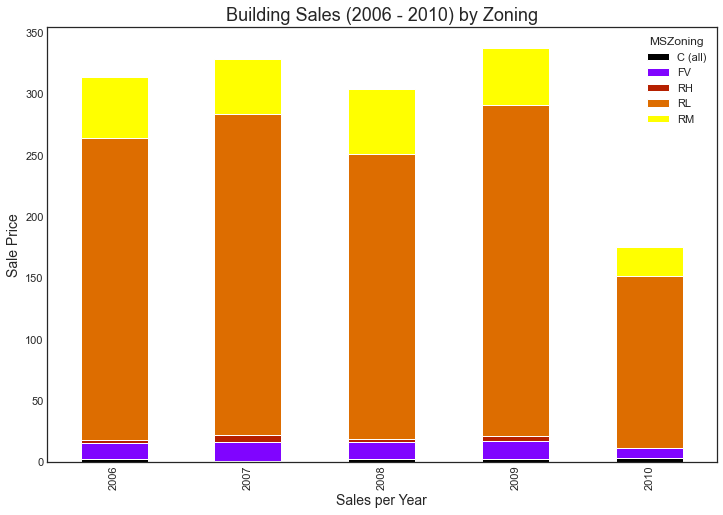

In [138]:
plt.style.use('seaborn-white')
SalesbyZone = housing.groupby(['YrSold','MSZoning']).SalePrice.count()
SalesbyZone.unstack().plot(kind='bar',stacked=True, colormap= 'gnuplot',  
                           grid=False,  figsize=(12,8))
plt.title('Building Sales (2006 - 2010) by Zoning', fontsize=18)
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Sales per Year', fontsize=14)
plt.show()

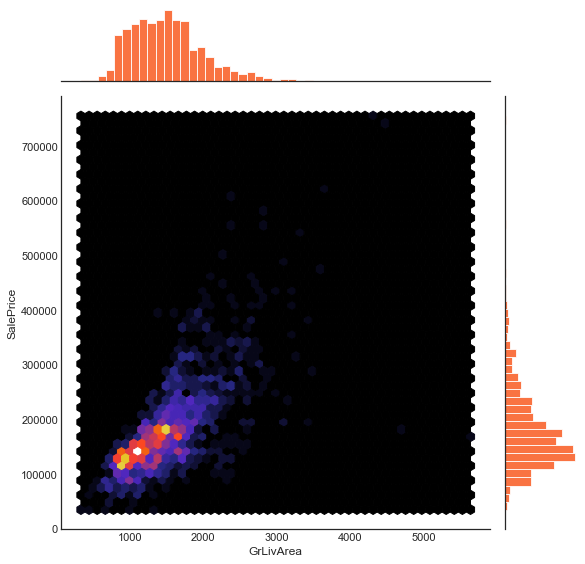

In [164]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=housing,
              kind='hex', cmap= 'CMRmap', height=8, color='#F84403')

plt.show()

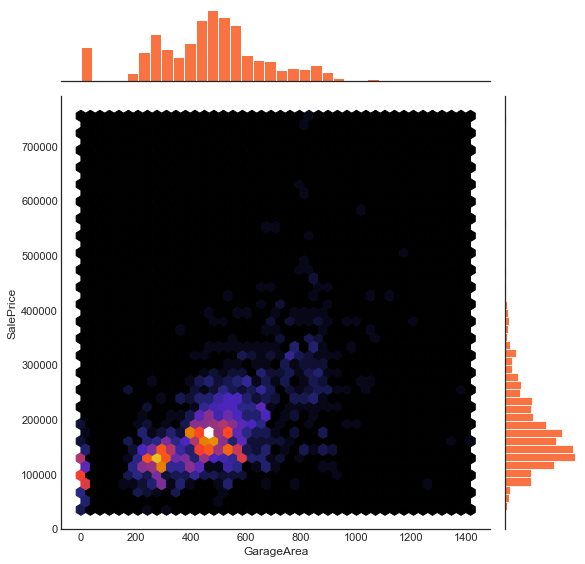

In [165]:
sns.jointplot(x='GarageArea',y='SalePrice',data=housing,
              kind='hex', cmap= 'CMRmap', height=8, color='#F84403')

plt.show()

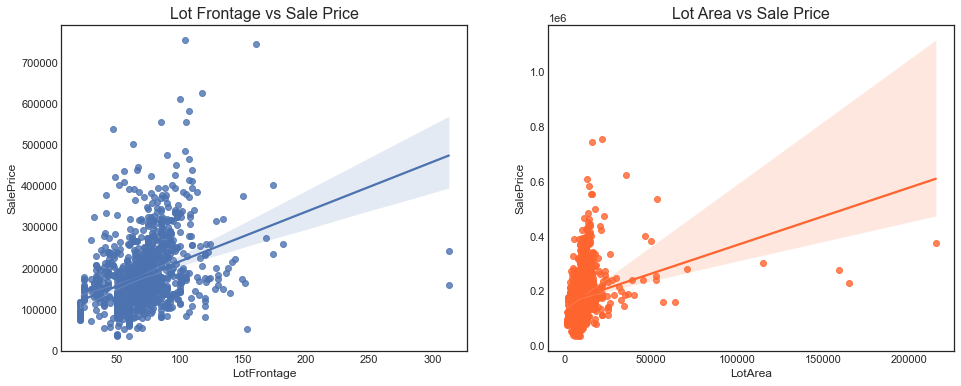

In [145]:
plt.figure(figsize=(16,6))
plt.subplot(121)
ax = sns.regplot(x="LotFrontage", y="SalePrice", data=housing)
ax.set_title("Lot Frontage vs Sale Price", fontsize=16)

plt.subplot(122)
ax1 = sns.regplot(x="LotArea", y="SalePrice", data=housing, color='#FE642E')
ax1.set_title("Lot Area vs Sale Price", fontsize=16)

plt.show()

In [146]:
building_df.head()

,SalePrice,MSSubClass,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,208500.0,60,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,Typ,Attchd,2003.0,RFn,2.0,548.0,2,2008,WD,Normal
2,181500.0,20,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,Typ,Attchd,1976.0,RFn,2.0,460.0,5,2007,WD,Normal
3,223500.0,60,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,Typ,Attchd,2001.0,RFn,2.0,608.0,9,2008,WD,Normal
4,140000.0,70,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,Typ,Detchd,1998.0,Unf,3.0,642.0,2,2006,WD,Abnorml
5,250000.0,60,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,Typ,Attchd,2000.0,RFn,3.0,836.0,12,2008,WD,Normal


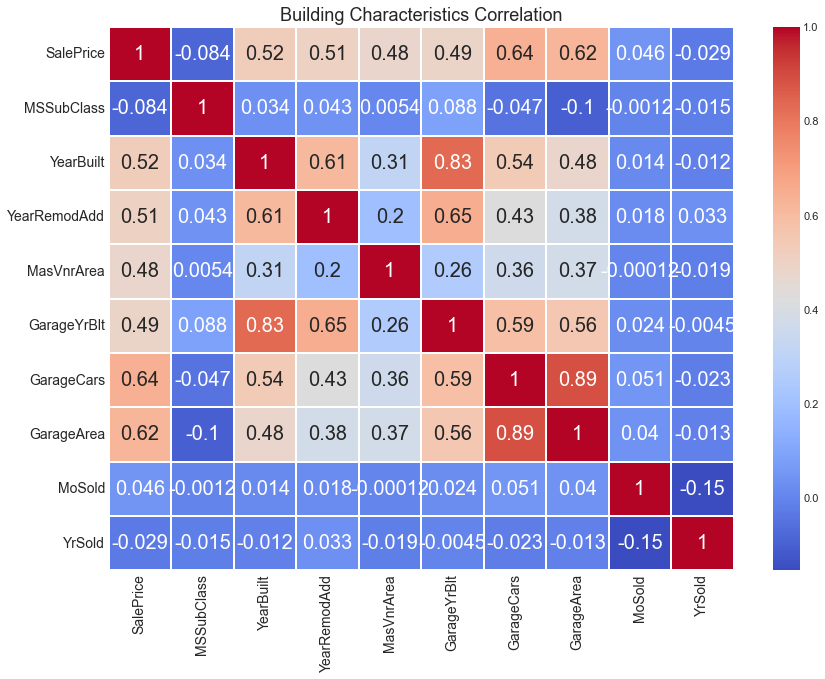

In [147]:
corr = building_df.corr()

g = sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':20})
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 8)
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title("Building Characteristics Correlation", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

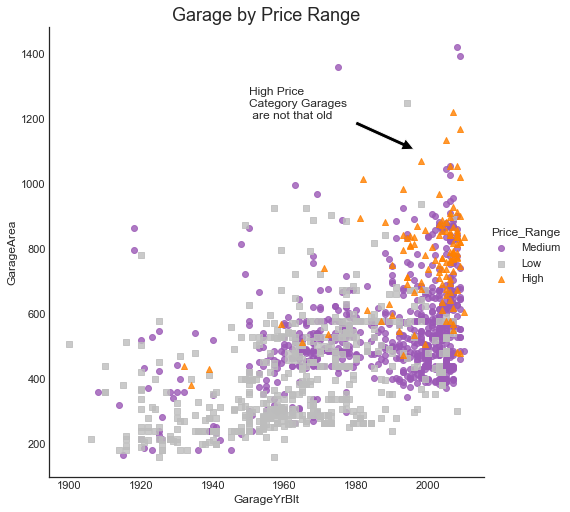

In [161]:

housing['Price_Range'] = np.nan
lst = [housing]
for column in lst:
    column.loc[column['SalePrice'] < 150000, 'Price_Range'] = 'Low'
    column.loc[(column['SalePrice'] >= 150000) & (column['SalePrice'] <= 300000), 'Price_Range'] = 'Medium'
    column.loc[column['SalePrice'] > 300000, 'Price_Range'] = 'High'


import matplotlib.pyplot as plt
palette = ["#9b59b6", "#BDBDBD", "#FF8000"]
sns.lmplot('GarageYrBlt', 'GarageArea', data=housing, hue='Price_Range', fit_reg=False, height=7, palette=palette,
          markers=["o", "s", "^"])
plt.title('Garage by Price Range', fontsize=18)
plt.annotate('High Price \nCategory Garages \n are not that old', xy=(1997, 1100), xytext=(1950, 1200), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

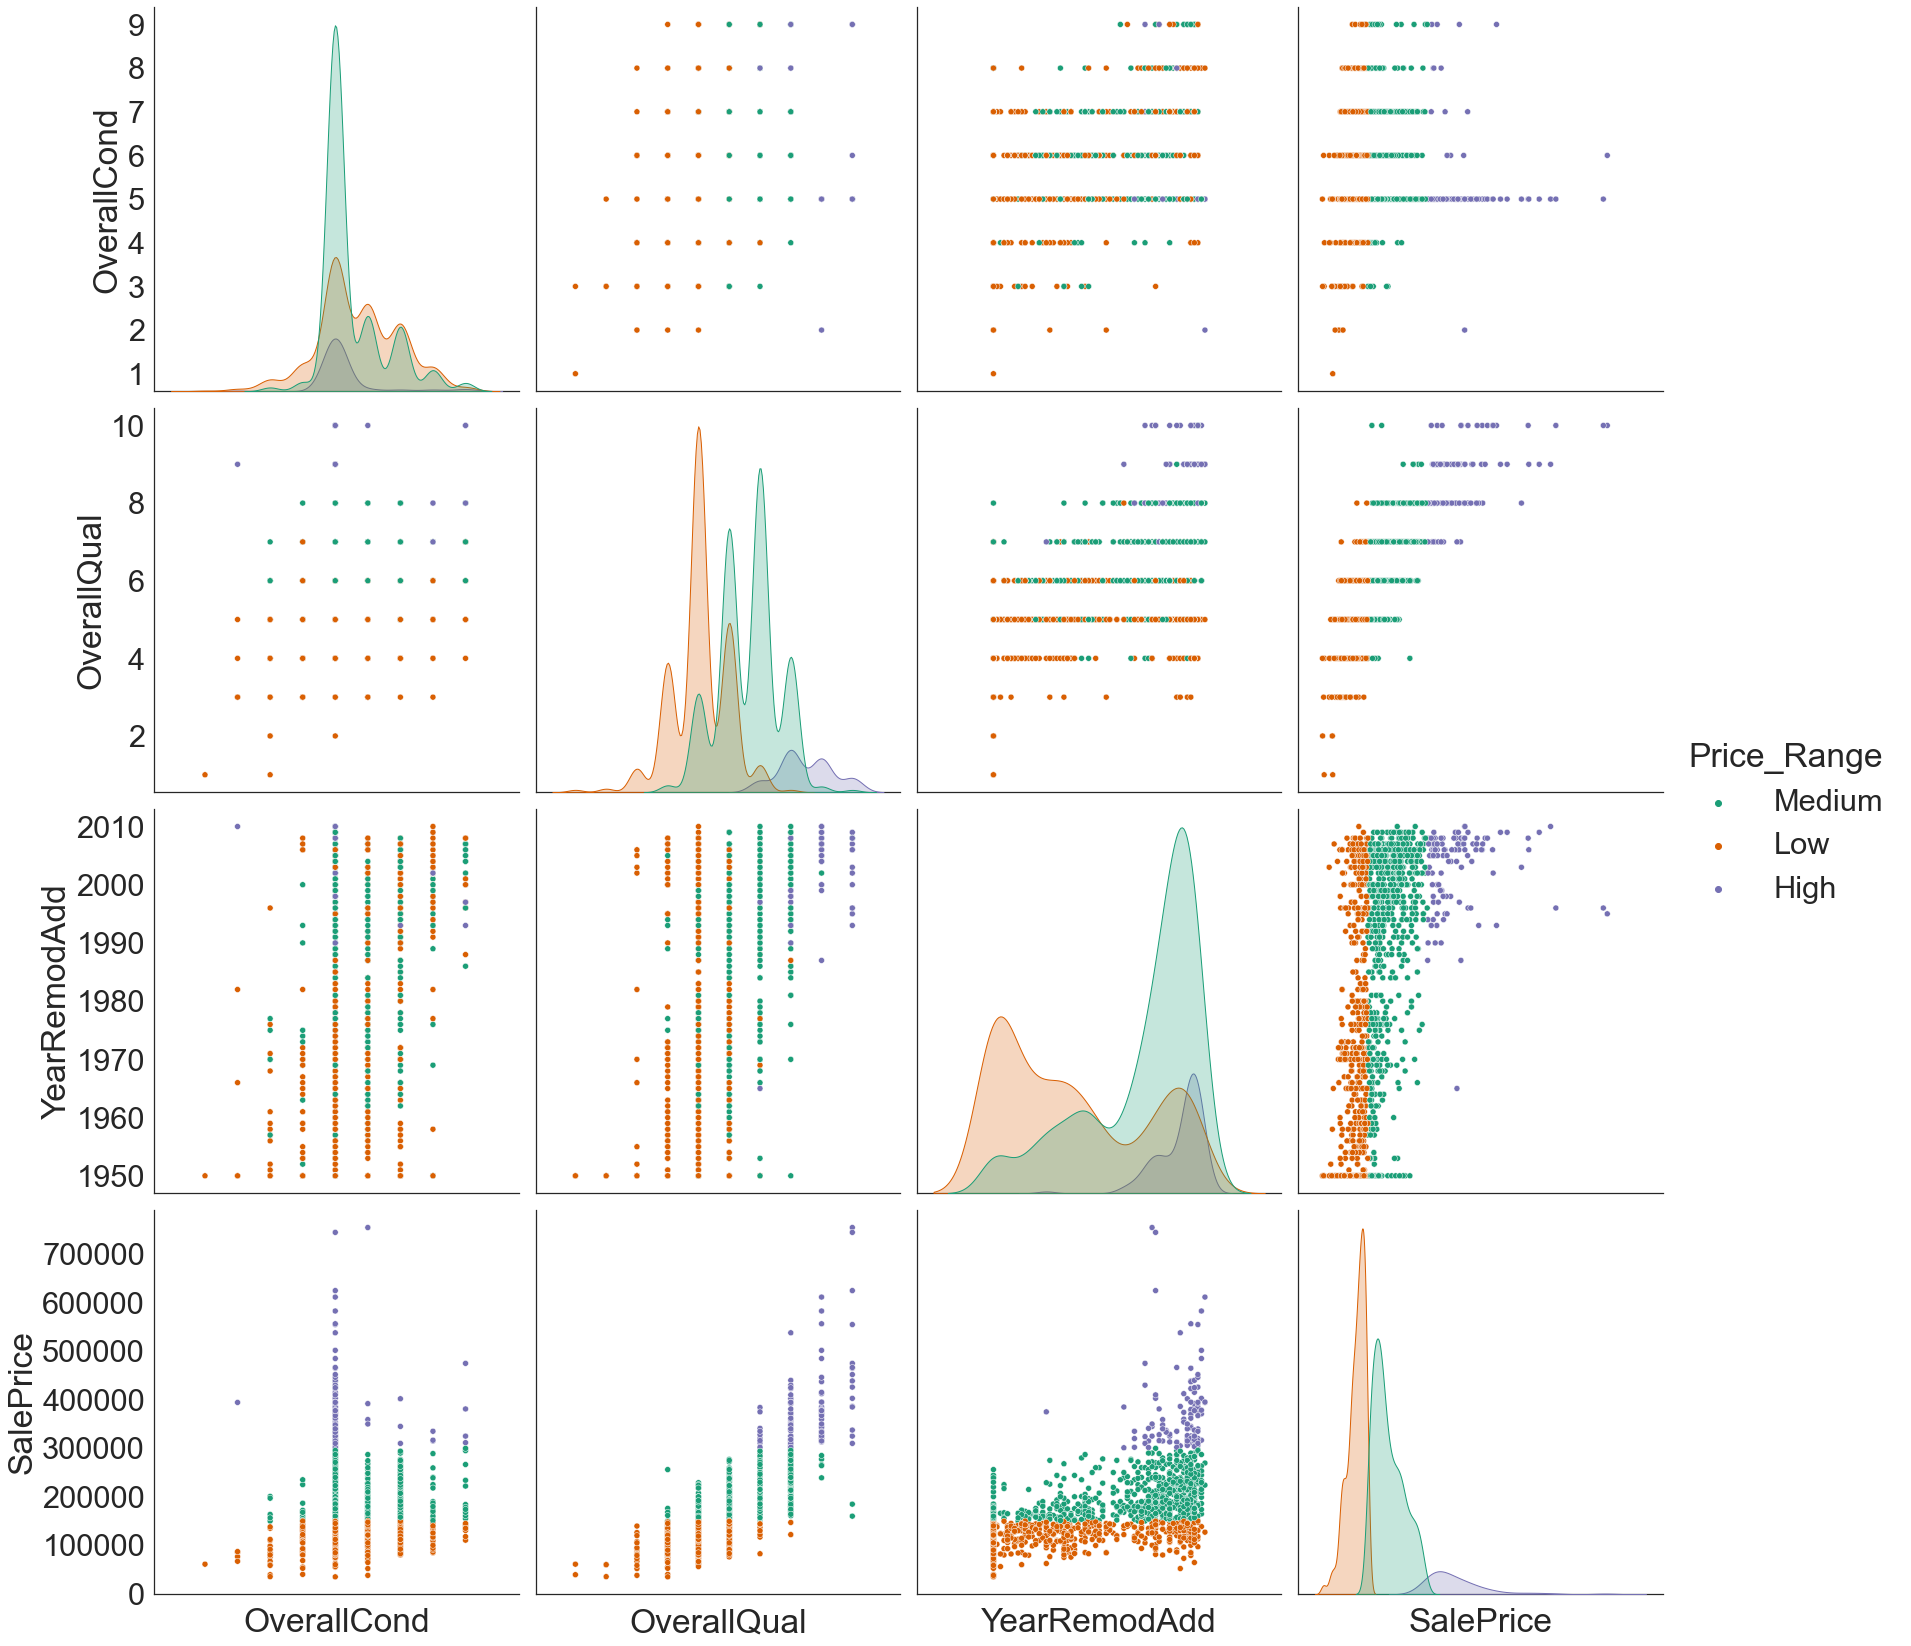

In [171]:
with sns.plotting_context("notebook",font_scale=2.8):
    g = sns.pairplot(housing, vars=["OverallCond", "OverallQual", "YearRemodAdd", "SalePrice"],
                hue="Price_Range", palette="Dark2", height=6)


g.set(xticklabels=[]);

plt.show()

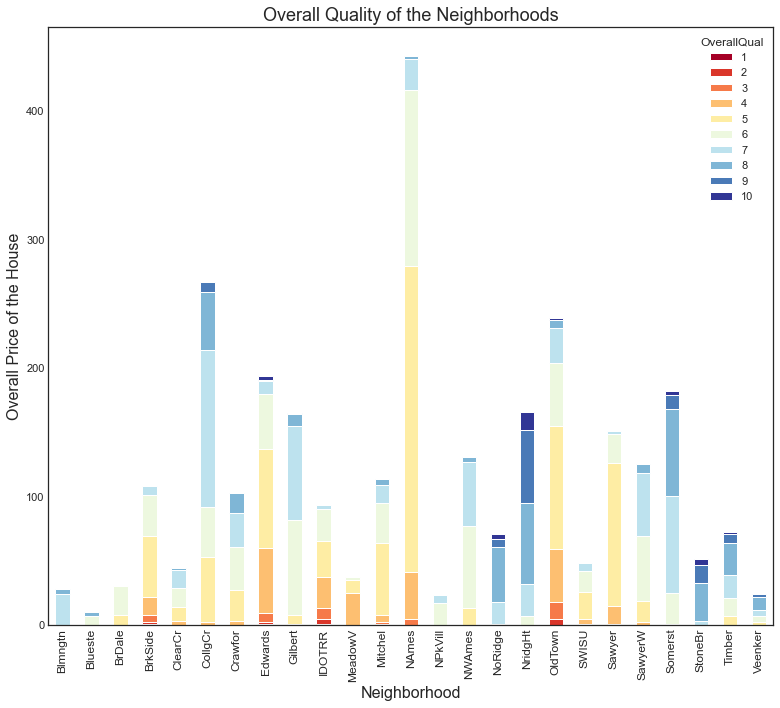

In [173]:
plt.style.use('seaborn-white')
types_foundations = housing.groupby(['Neighborhood', 'OverallQual']).size()
types_foundations.unstack().plot(kind='bar', stacked=True, colormap='RdYlBu', figsize=(13,11), grid=False)
plt.ylabel('Overall Price of the House', fontsize=16)
plt.xlabel('Neighborhood', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.title('Overall Quality of the Neighborhoods', fontsize=18)
plt.show()

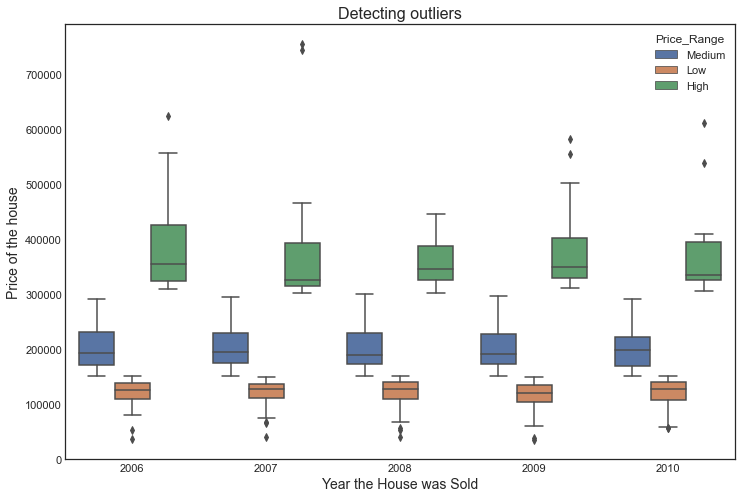

In [175]:
# Most outliers are in the high price category nevertheless, in the year of 2007 saleprice of two houses look extremely high!

fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x="YrSold", y="SalePrice", hue='Price_Range', data=housing)
plt.title('Detecting outliers', fontsize=16)
plt.xlabel('Year the House was Sold', fontsize=14)
plt.ylabel('Price of the house', fontsize=14)
plt.show()